In [2]:
import pandas as pd
import numpy as np

In [10]:
AQXDaily=pd.read_csv("AQXDaily_20170409211519.csv")
AQXDaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
SiteId          1000 non-null int64
SiteName        1000 non-null object
MonitorDate     1000 non-null object
PSI             1000 non-null int64
SO2SubIndex     991 non-null float64
COSubIndex      920 non-null float64
O3SubIndex      852 non-null float64
PM10SubIndex    988 non-null float64
NO2SubIndex     0 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 70.4+ KB


In [7]:
AQXDaily.head()

,SiteId,SiteName,MonitorDate,PSI,SO2SubIndex,COSubIndex,O3SubIndex,PM10SubIndex,NO2SubIndex
0,83,麥寮,2017-04-08,52,4.0,NaN,NaN,52.0,NaN
1,80,關山,2017-04-08,25,2.0,NaN,25.0,23.0,NaN
2,78,馬公,2017-04-08,27,1.0,2.0,24.0,27.0,NaN
3,77,金門,2017-04-08,24,3.0,2.0,24.0,23.0,NaN
4,75,馬祖,2017-04-08,39,5.0,5.0,37.0,39.0,NaN


In [4]:
AQXDaily.describe()

,SiteId,PSI,SO2SubIndex,COSubIndex,O3SubIndex,PM10SubIndex,NO2SubIndex
count,1000.000000,1000.000000,991.000000,920.000000,852.000000,988.000000,0.0
mean,39.434000,63.540000,5.353179,6.884783,61.374413,55.302632,NaN
std,22.885615,12.326977,2.659534,3.886556,14.259619,11.778370,NaN
min,1.000000,24.000000,1.000000,1.000000,18.000000,17.000000,NaN
25%,20.000000,56.000000,4.000000,5.000000,52.000000,49.750000,NaN
50%,39.000000,63.000000,5.000000,6.000000,62.000000,56.000000,NaN
75%,59.000000,72.000000,7.000000,8.000000,71.000000,62.000000,NaN
max,83.000000,112.000000,28.000000,29.000000,112.000000,88.000000,NaN


## 2. find relation

In [11]:
AQXDaily=AQXDaily.dropna(axis=1,how="all").dropna(axis=0,how="any")

c:\users\alixh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000276432E3748>,
      dtype=object)

c:\users\alixh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


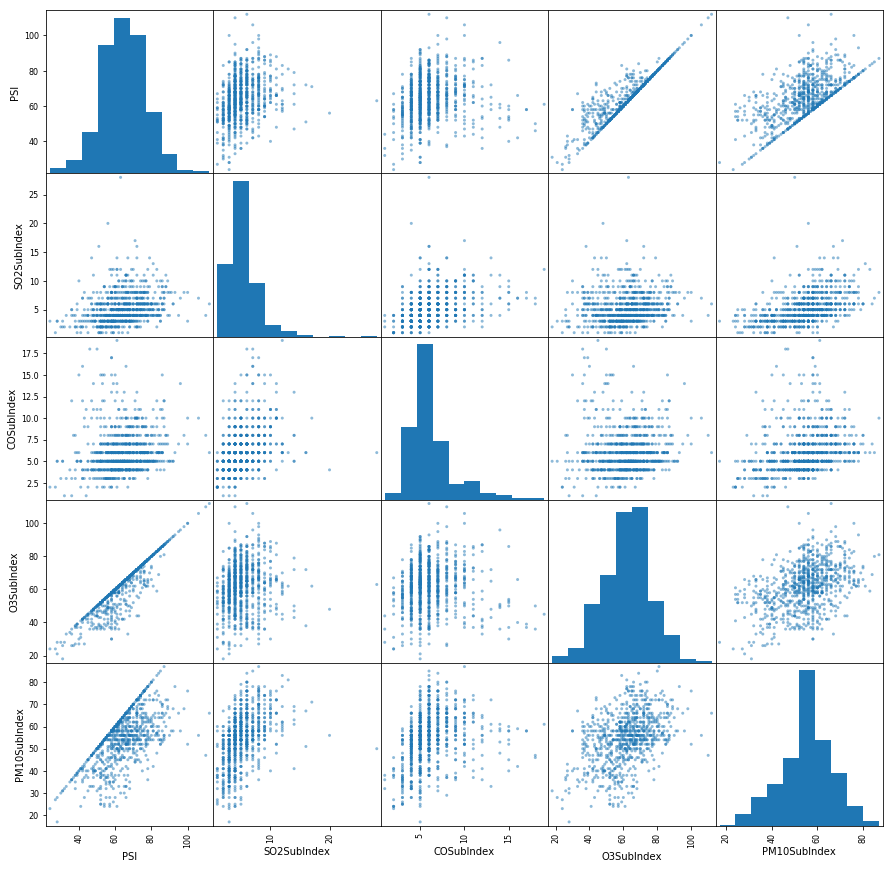

In [33]:
from pandas.tools import plotting
plotting.scatter_matrix(AQXDaily[['PSI', 'SO2SubIndex', 'COSubIndex','O3SubIndex','PM10SubIndex']],figsize=(15,15))

In [40]:
from scipy import stats
stats.ttest_1samp(AQXDaily['SO2SubIndex'], 0)

Ttest_1sampResult(statistic=56.64167274303722, pvalue=1.7055161301120405e-285)